In [11]:
%load_ext autoreload
%autoreload 2
from repeater import WaldhauserRepeaterCatalog, IgarashiRepeaterCatalog, TakaAkiRepeaterCatalog
from earthquake import EarthquakeCatalog
import copy
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from research_util import savefig, add_lettering

mpl.rc('figure', dpi=200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#repeaters = WaldhauserRepeaterCatalog()
repeaters = TakaAkiRepeaterCatalog(
    filename="SJBPK.freq8-24Hz_maxdist3_coh9650_linkage_cluster.txt",
)
# catalog = repeaters.catalog

/Users/kdascher/Documents/Documents/Berkeley/Projects/Exploratory_projects/repeaters/repeater.py:81: RuntimeWarning: invalid value encountered in double_scalars
  return bias_correction * np.std(dt) / np.mean(dt)


<AxesSubplot: xlabel='Time', ylabel='mag'>

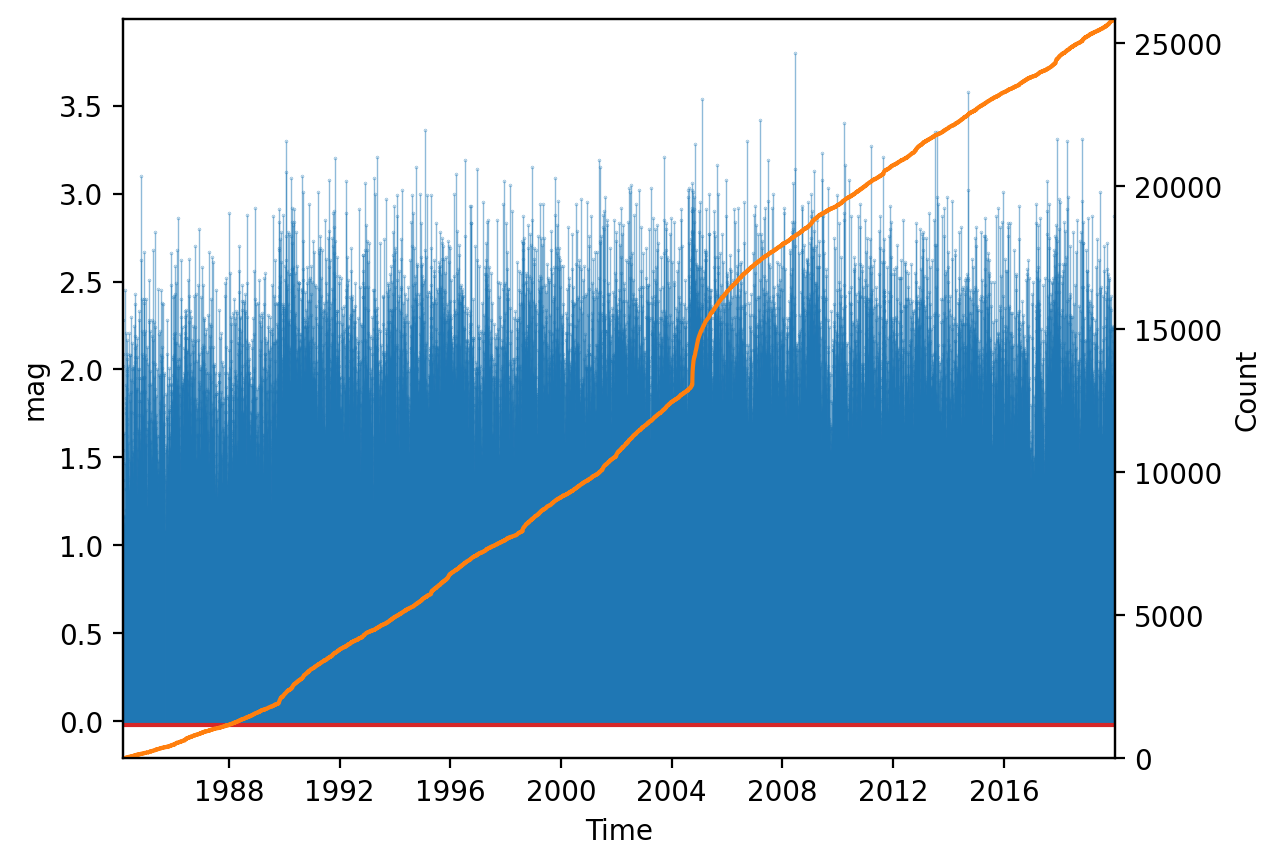

In [13]:
repeaters.plot_time_series()

In [14]:
data_directory = Path('data/earthquake_catalogs/')
earthquake_metadata = {
    "starttime": '1990-01-01',
    "endtime": '2024-01-01',
    "latitude_range": [-90,90],
    "longitude_range": [-180,180],
    "minimum_magnitude": 1, 
} 

earthquakes = EarthquakeCatalog(
    filename=data_directory/'global_ALL.csv',
    kwargs=earthquake_metadata,
) # expect warnings about loading existing catalog and Nan values

/Users/kdascher/Documents/Documents/Berkeley/Projects/Exploratory_projects/repeaters/earthquake.py:176: UserWarning: Using existing data/earthquake_catalogs/global_ALL.csv
  warnings.warn(f"Using existing {filename}")
/Users/kdascher/Documents/Documents/Berkeley/Projects/Exploratory_projects/repeaters/earthquake.py:182: UserWarning: 27913 NaN values found in catalog. Removing rows with NaN values.
  warnings.warn(


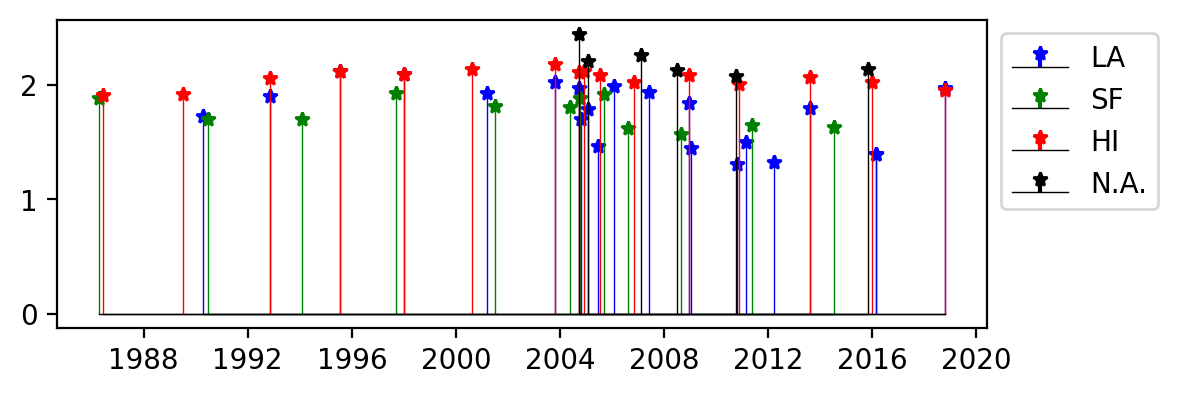

In [15]:
bounding_box = [
    [-120.625,-120.525],
    [35.95,36.0]
]

safod_repeaters = (
    repeaters
    .get_space_slice(latitude_range=bounding_box[1], longitude_range=bounding_box[0])
    .slice_by('depth',2.1,3.5)
    .slice_by('mag',1.2,3)
)

mean_magnitude = np.array([f.catalog.mag.mean() for f in safod_repeaters.get_families()])

fig, ax = plt.subplots(figsize=(6,2))
for i, family in enumerate([safod_repeaters.get_families()[i] for i in np.argsort(mean_magnitude).astype(int)[-4:]]):

    markerline, stemline, baseline = ax.stem(family.catalog.time, family.catalog.mag, markerfmt=f'C{i%9}.',label=["LA","SF","HI","N.A."][i])
    plt.setp(markerline, 'color', ['b','g','r','k'][i],'marker','*','markersize',5,'linewidth',0.1)
    plt.setp(stemline, 'linewidth', 0.5, 'color',['b','g','r','k'][i])
    plt.setp(baseline, 'linewidth', 0.5, 'color','k')

plt.legend(bbox_to_anchor=[1,1])

